
# Introduction to sidpy and pycroscopy

**Gerd Duscher, Suhas Somnath, Maxim Ziatdinov, Rama Vasudevan, Mani Valleti**

07/03/2023

Here we will walk through the sidpy.Dataset object, and showcase some features of the pycroscopy package


In [1]:
#Load required packages
!pip install pyNSID SciFiReaders nanonispy gwyfile pycroscopy wget ipympl sidpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.0/340.0 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 46.5 MB/s eta 0:00:

In [6]:
import sys
import sidpy
print('sidpy version: ', sidpy.__version__)

import h5py
import pyNSID
import SciFiReaders as sr
import numpy as np
import matplotlib.pyplot as plt

sidpy version:  0.12.0


In [7]:
#Check if in Google colab or not
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    %matplotlib widget
    from google.colab import output
    output.enable_custom_widget_manager()
else:
    %matplotlib notebook

## Creating a ``sipy.Dataset`` object
We can create a simple sidpy Dataset from any array like object
Here we just use a numpy array filled with zeros



In [8]:
data_set = sidpy.Dataset.from_array(np.random.random([4, 5, 10]), name='random')

print(data_set)
data_set

sidpy.Dataset of type UNKNOWN with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: generic (generic)
 and Dimensions: 
a:  generic (generic) of size (4,)
b:  generic (generic) of size (5,)
c:  generic (generic) of size (10,)


sidpy.Dataset of type UNKNOWN with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: generic (generic)
 and Dimensions: 
a:  generic (generic) of size (4,)
b:  generic (generic) of size (5,)
c:  generic (generic) of size (10,)

Note that ``data_set`` is a dask array....
We will be improving upon the information that will be displayed when printing ``sidpy.Dataset`` objects

Accessing data within a ``Dataset``:
Indexing of the dataset works like in numpy
Note, that we first index and then we make a numpy array for printing reasons


In [9]:
print(np.array(data_set[:,0,2]))

[0.07870469 0.62919201 0.09776053 0.12504372]


## Metadata
``sidpy`` automatically assigns generic top-level metadata regarding the
``Dataset``. Users are encouraged to capture the context regarding the dataset.
The attributes included in the sidpy dataset are
Required Attributes:

- ``quantity``: string: Physical quantity that is contained in this dataset

- ``units``: string: Units for this physical quantity

- ``data_type``: string : What kind of data this is. Example - image, image stack, video, hyperspectral image, etc.

- ``modality``: string : Experimental / simulation modality - scientific meaning of data. Example - photograph, TEM micrograph, SPM Force-Distance spectroscopy.

- ``source``: string : Source for dataset like the kind of instrument. One could go very deep here into either the algorithmic details if this is a result from analysis or the exact configurations for the instrument that generated this dataset.

Those attributes are set to ``generic`` originally but one would want to set them
for the specific dataset. The attributes ``data_type``, ``quantity`` and ``units``  will be important for plotting the data.

Here's how one could do that, but with the wrong key word:



In [10]:
data_set.data_type = 'spectrum_image'  # not supported

Warning: ignored

Here's how one could do that sucessfully:

In [11]:
data_set.data_type = 'spectral_image'  # supported

data_set.units = 'nA'
data_set.quantity = 'Current'

### Scientific metadata
These ``Dataset`` objects can also capture rich scientific metadata such as
acquisition parameters, etc. as well:
We would want to add those parameters as attributes.
These attributes could be lists, numpy arrays or simple dictionaries.
It is encouraged to add any parameters of data analysis to the datasets,
to keep track of input parameters. Here I made some up as an illustration:

 These ``Dataset`` objects can also capture rich scientific metadata such as acquisition parameters, etc. as well:

We would want to add those parameters as attributes. These attributes could be lists, numpy arrays or simple dictionaries. It is encouraged to add any parameters of data analysis to the datasets, to keep track of input parameters.

It is recommended to add any parameters to the (nested) metadata dictionary.
These metadata can then be viewed in dataset.view_metadata and dataset.view_original_metadata. It is encouraged to add any parameters of data analysis to the datasets, to keep track of input parameters.

There is a size limit of 64kB for the storage of dictionaries in h5py. Therefore, large data such as reference data should be added directly as attributes. All attributes that you add to a dataset will be stored within the pyNSID file.

Please note, that the dictionary ``original_metadata`` should not be changed so that information provided by the acquisition device stays pristine, but relevant inforamtion should be copied over to the ``metadata`` attribute/dictionary.

Here I made up some metadata as an illustration:

In [12]:
data_set.calibration = np.arange(5)
data_set.metadata = {'nothing': ' ', 'value': 6.8, 'instrument': {'microscope': 'Nion', 'acceleration_voltage':60000}}
data_set.metadata['acquired'] = 'nowhere'

print(data_set.calibration)
sidpy.dict_utils.print_nested_dict(data_set.metadata)

[0 1 2 3 4]
nothing :  
value : 6.8
instrument :
	microscope : Nion
	acceleration_voltage : 60000
acquired : nowhere


Another set of metadata in these Datasets is the Dimension ones:



## Dimensions
The ``Dataset`` is automatically populated with generic information about
each dimension of the ``Dataset``. It is a good idea to capture context
regarding each of these dimensions using ``sidpy.Dimension``.
As a minimum we need a name and values (of the same length as the dimensions of the data).
One can provide as much or as little information about each dimension.



In [13]:
data_set.set_dimension(0, sidpy.Dimension(np.arange(data_set.shape[0]),
                                          name='x', units='um', quantity='Length',
                                          dimension_type='spatial'))
data_set.set_dimension(1, sidpy.Dimension(np.linspace(-2, 2, num=data_set.shape[1], endpoint=True),
                                          'y', units='um', quantity='Length',
                                          dimension_type='spatial'))
data_set.set_dimension(2, sidpy.Dimension(np.sin(np.linspace(0, 2 * np.pi, num=data_set.shape[2])),
                                          'bias' ))

One could also manually add information regarding specific components of
dimensions associated with Datasets via:



In [14]:
data_set.bias.dimension_type = 'spectral'
data_set.bias.units = 'V'
data_set.bias.quantity = 'Bias'

Let's take a look at what the dataset looks like with the additional information
regarding the dimensions.

We can access a dimension by its name or by the dimension number.

Also the print function now provides a little more information about our dataset.

In [15]:
print(data_set.bias)
print(data_set.dim_1)
print(data_set)
data_set

bias:  Bias (V) of size (10,)
y:  Length (um) of size (5,)
sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: Current (nA)
 and Dimensions: 
x:  Length (um) of size (4,)
y:  Length (um) of size (5,)
bias:  Bias (V) of size (10,)
 with metadata: ['nothing', 'value', 'instrument', 'acquired']


sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: Current (nA)
 and Dimensions: 
x:  Length (um) of size (4,)
y:  Length (um) of size (5,)
bias:  Bias (V) of size (10,)
 with metadata: ['nothing', 'value', 'instrument', 'acquired']

## Plotting
The ``Dataset`` object also comes with the ability to visualize its contents
using the ``plot()`` function. Here we only show a simple application, but a more
detailed description can be found in the plotting section.
Here we plot a spectral image you can click in the image part of the plot on the
left and the spectrum on the right will update.



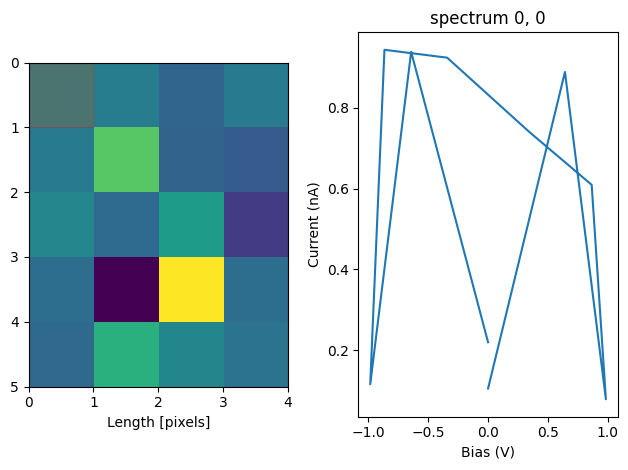

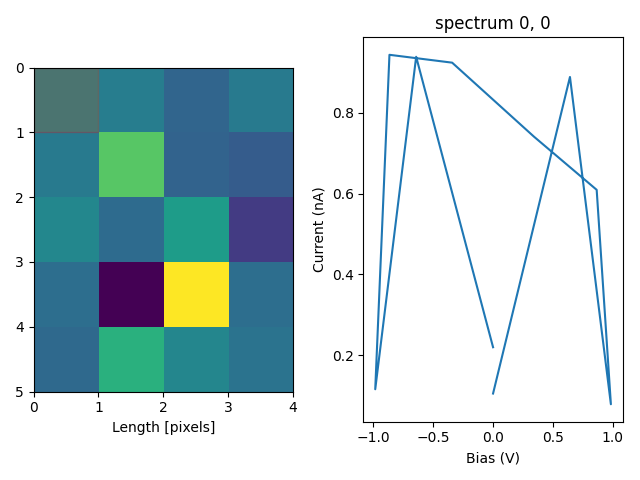

In [16]:
data_set.plot()

The plotting depends on the data_type of the dataset and the dimension_types
of it's dimension datasets. Above, we set the first two dimension_type types to
``spatial`` and the third one to ``spectral``.

The data_type was ``spectral_image``.
So the spatial dimensions are recognized as relevant for an image and the third dimension is recognized as a spectrum, conducive to plotting as shown above.
If we change the data_type to image, the default plotting behavoir is to plot the first slice in the dataset (i.e. data_set[:,:,0]).



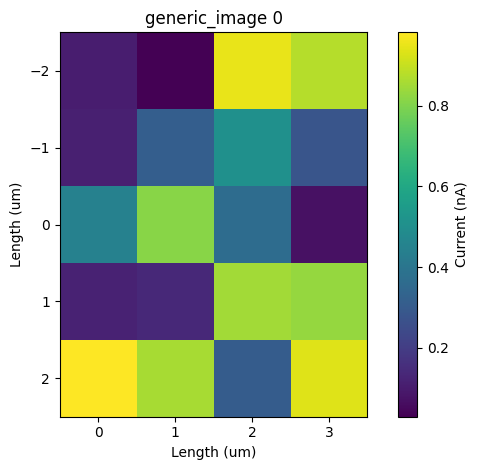

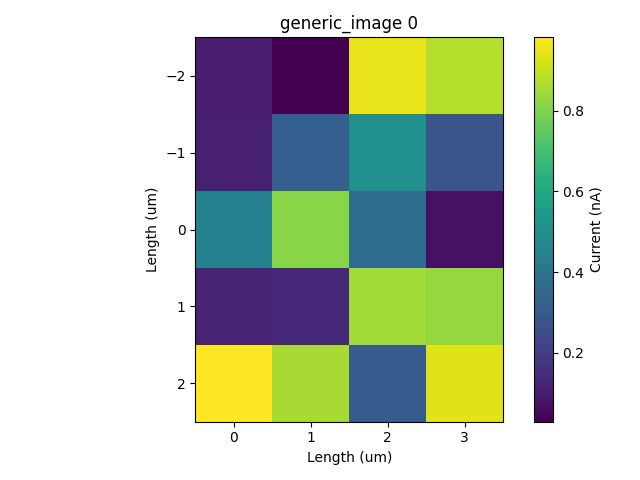

In [17]:
data_set.data_type = 'image'
data_set.plot()

## Saving

These ``Dataset`` objects will be deleted from memory once the python script
completes or when a notebook is closed. The information collected in a
``Dataset`` can reliably be stored to files using functions in sister
packages - ``pyUSID`` and ``pyNSID`` that write the dataset according to the
**Universal Spectroscopy and Imaging Data (USID)** or **N-dimensional
Spectrocsopy and Imaging Data (NSID)** formats.




In [18]:
#Here is how we can save the data to a pyNSID format

new_h5_filename = r'example_file4.hf5'
hf = h5py.File(new_h5_filename, 'a') #Create a new file

#We can save the fitted results with pyNSID
hf_grp = hf.create_group('Measurement_000/Channel_000') #Create a group

#Let's save the data
pyNSID.hdf_io.write_nsid_dataset(data_set, hf_grp, main_data_name="my_data")

/usr/local/lib/python3.10/dist-packages/pyNSID/io/hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


<HDF5 dataset "my_data": shape (4, 5, 10), type "<f8">

In [19]:
#Let's close the file
hf.close()

In [20]:
#Now let's reopen it, and see what got saved
#To read the file we can use SciFIReaders's NSID reader

hf = h5py.File(new_h5_filename, 'r+') #Load the file

In [21]:
sidpy.hdf_utils.print_tree(hf) #print out the contents of the file as a tree

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ my_data
      -------
      ├ bias
      ├ metadata
        --------
        ├ instrument
          ----------
      ├ my_data
      ├ x
      ├ y


In [22]:
#Let's read in the data. For this we use NSIDReader

nsid_reader = sr.NSIDReader(new_h5_filename)

In [23]:
datasets = nsid_reader.read();

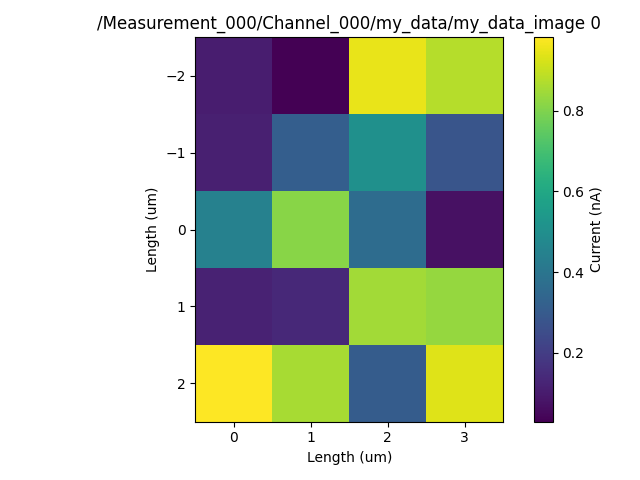

In [24]:
datasets[0].plot();

In [25]:
datasets[0].metadata #we still have all the metadata

{'acquired': 'nowhere',
 'nothing': ' ',
 'value': 6.8,
 'instrument': {'acceleration_voltage': 60000, 'microscope': 'Nion'}}

## Exercise
1. Load your own dataset using SciFiReaders, or create one in sidpy.
2. Plot your dataset using the .plot() command. Eg., create a 4D dataset ("IMAGE_4D")